# Analiza zbioru New York Times

In [54]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
df = pd.read_csv('http://home.agh.edu.pl/~czech/vis-datasets/misc/nyt-frame.csv', header = 0)
data = df.iloc[:,9:]
array = data.values

In [55]:
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['honoring' 'psychological' 'illegal' 'overlapping' 'provide'
 'effectively' 'lists' 'couple' 'contrast' 'bounds' 'seeing' 'veterans'
 'printing' 'lisa' 'revival' 'light' 'hot' 'realized' 'smooth' 'inside']


In [56]:
pca = PCA()
X_pca = pca.fit_transform(array)

In [57]:
# Definicja pierwszego komponentu wiodącego
pc1 = pca.components_[0]
print(pc1)

[-0.0031005  -0.00091392  0.01580379 ... -0.00098786  0.00721068
 -0.00579702]


In [72]:
minimum_1 = pc1.argsort()[0:15]
maximum_1 = pc1.argsort()[-15:][::-1]
attributes = df.columns.values[9:]

In [59]:
print("----PC1----")
for i in maximum_1:
    print(attributes[i], ":", pca.components_[0][i])
    
print("---------------------------------")

for i in minimum_1:
    print(attributes[i], ":", pca.components_[0][i])

# Największe wartości występują przy słowach związanych ze sztuką (mimo zaszumienia zaimkami osobowymi),
# a najmniejsze przy słowach związanych z muzyką

----PC1----
she : 0.2612739189053147
her : 0.24529311441720533
ms : 0.20211292705699652
i : 0.1502827888384332
said : 0.13360556763625336
mother : 0.10687219119361722
cooper : 0.10300939205022888
my : 0.09432521211958217
painting : 0.0878870984174897
process : 0.07119630147343925
paintings : 0.06988483529500217
im : 0.06857385461154207
mrs : 0.06562096808145738
he : 0.06531001248089248
me : 0.06379278250161455
---------------------------------
music : -0.11211617341838465
trio : -0.08780731643381678
theater : -0.07404600988801428
orchestra : -0.0692689982675338
composers : -0.058590609670586595
opera : -0.05555364096730141
theaters : -0.05117796156989038
m : -0.04902545227080594
program : -0.049001383290293805
players : -0.04881882614499734
festival : -0.04812333139017833
east : -0.047940868937490985
y : -0.04791174835954275
jersey : -0.046032354122823034
symphony : -0.04493077625468062


In [60]:
# Definicja drugiego komponentu wiodącego
pc2 = pca.components_[1]
print(pc2)

[-0.00858988  0.00830568  0.00118628 ...  0.00556095 -0.00679603
 -0.00633814]


In [61]:
maximum_2 = pc2.argsort()[-15:][::-1]
minimum_2 = pc2.argsort()[0:15]

In [62]:
print("----PC2----")
for i in maximum_2:
    print(attributes[i], ":", pca.components_[1][i])
    
print("---------------------------------")

for i in minimum_2:
    print(attributes[i], ":", pca.components_[1][i])

# Tu z kolei widzimy odwrotną sytuację niż w PC1. Największe wartości są przy słowach związanych z muzyką (choć 
# również widać zaszumienie zaimkami osobowymi), a najmniejsze przy tych związanych ze sztuką

----PC2----
her : 0.22078475821587457
she : 0.21307376342525397
theater : 0.1623905985100131
opera : 0.129926375354569
ms : 0.12447032686713362
i : 0.081201552810567
hour : 0.08075865381307706
sang : 0.07465343667556106
production : 0.07415772534187773
festival : 0.07300940791699422
music : 0.07234461523901488
musical : 0.07070817873039455
songs : 0.06923167953630335
orchestra : 0.06760285785600754
vocal : 0.06758794058200364
---------------------------------
art : -0.15431673143840408
museum : -0.12089946277617673
images : -0.09522680440744576
artists : -0.09263497758879526
donations : -0.07765780277980369
museums : -0.07539497668344294
painting : -0.07401963974238178
tax : -0.0722686005890162
paintings : -0.06564345120814773
sculpture : -0.06035313871840528
gallery : -0.05515928883067855
sculptures : -0.051479139293811
painted : -0.05013831346292892
white : -0.04966737533217006
service : -0.0466642197571162


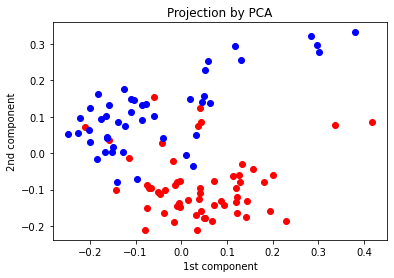

In [63]:
y = df.loc[:,'class.labels']
reds = y == "art"
blues = y == "music"

plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

# Widzimy na wykresie, że słowa "music" i "art" zostały dość dobrze odseparowane semantycznie oraz to, że 
# po stronie dodatniej występuje nieco większy szum. Możemy również zrzutować wyniki na oś OY i wówczas separacja
# będzie dość dobra

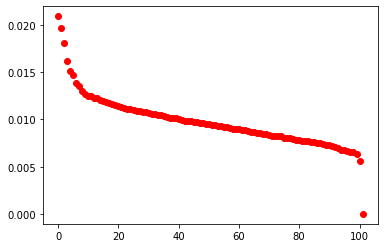

0.15773478029003493


In [64]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, "ro")
plt.show()
print(sum(variance_ratio[0:10]))

# Możemy zauważyć, że ten zbiór nie ma naturalnej niskiej wymiarowości. Na początku wariancja spada dość szybko,
# potem nieco wolniej

# Analiza zbioru 04Cars

In [80]:
df = pd.read_csv('http://home.agh.edu.pl/~czech/vis-datasets/misc/04cars-data.csv', header = 0)
df_cut = df.iloc[:, 9:]

In [81]:
# Skalowanie zbioru w celu zapewnienia średniej arytmetycznej równej zero i wariancji równej 1
df_scaled = preprocessing.scale(df_cut)
print(df_scaled)

[[ 0.5342275   0.47954631  0.36782701 ...  1.10042148  0.91058658
   0.21507724]
 [ 0.65326826  0.59622579  0.36782701 ...  1.10042148  0.91058658
   0.21507724]
 [ 0.18852702  0.16200584  0.36782701 ... -0.17123347  0.30548333
   1.70141457]
 ...
 [-0.36022806 -0.32440105 -1.21163543 ... -0.87770844 -0.37525783
  -0.97399263]
 [ 0.09715245  0.14942056 -0.61933701 ...  0.25265151  0.07856961
   0.5123447 ]
 [ 0.40706455  0.47042898 -0.22447141 ...  0.81783149  0.30548333
   1.10687963]]


In [82]:
df_scaled.mean(axis=0)

array([-4.13106242e-17,  4.13106242e-17, -6.05889155e-16, -1.00981526e-16,
       -1.79012705e-16, -4.59006935e-18, -7.57361443e-17, -2.06553121e-16,
        7.89491929e-16, -6.70150125e-16,  1.78094691e-15])

In [83]:
df_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [84]:
pca = PCA()
X_pca = pca.fit_transform(df_scaled)
print(pca.explained_variance_ratio_)

[6.45876221e-01 1.71265888e-01 7.72480259e-02 3.24559536e-02
 2.50395994e-02 1.79948832e-02 1.27744735e-02 7.87625563e-03
 6.03527097e-03 3.36157838e-03 7.18504308e-05]


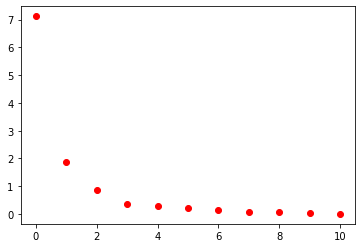

In [85]:
variance = pca.explained_variance_
plt.plot(variance, "ro")
plt.show()

# Możemy zauważyć, że wariancja maleje dość szybko. Przy redukcji wymiarowości do 2 i 3 niewielka
# część wariancji zostaje zachowana

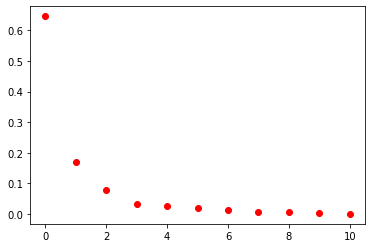

In [86]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, "ro")
plt.show()

In [101]:
attributes = df.columns.values[9:]

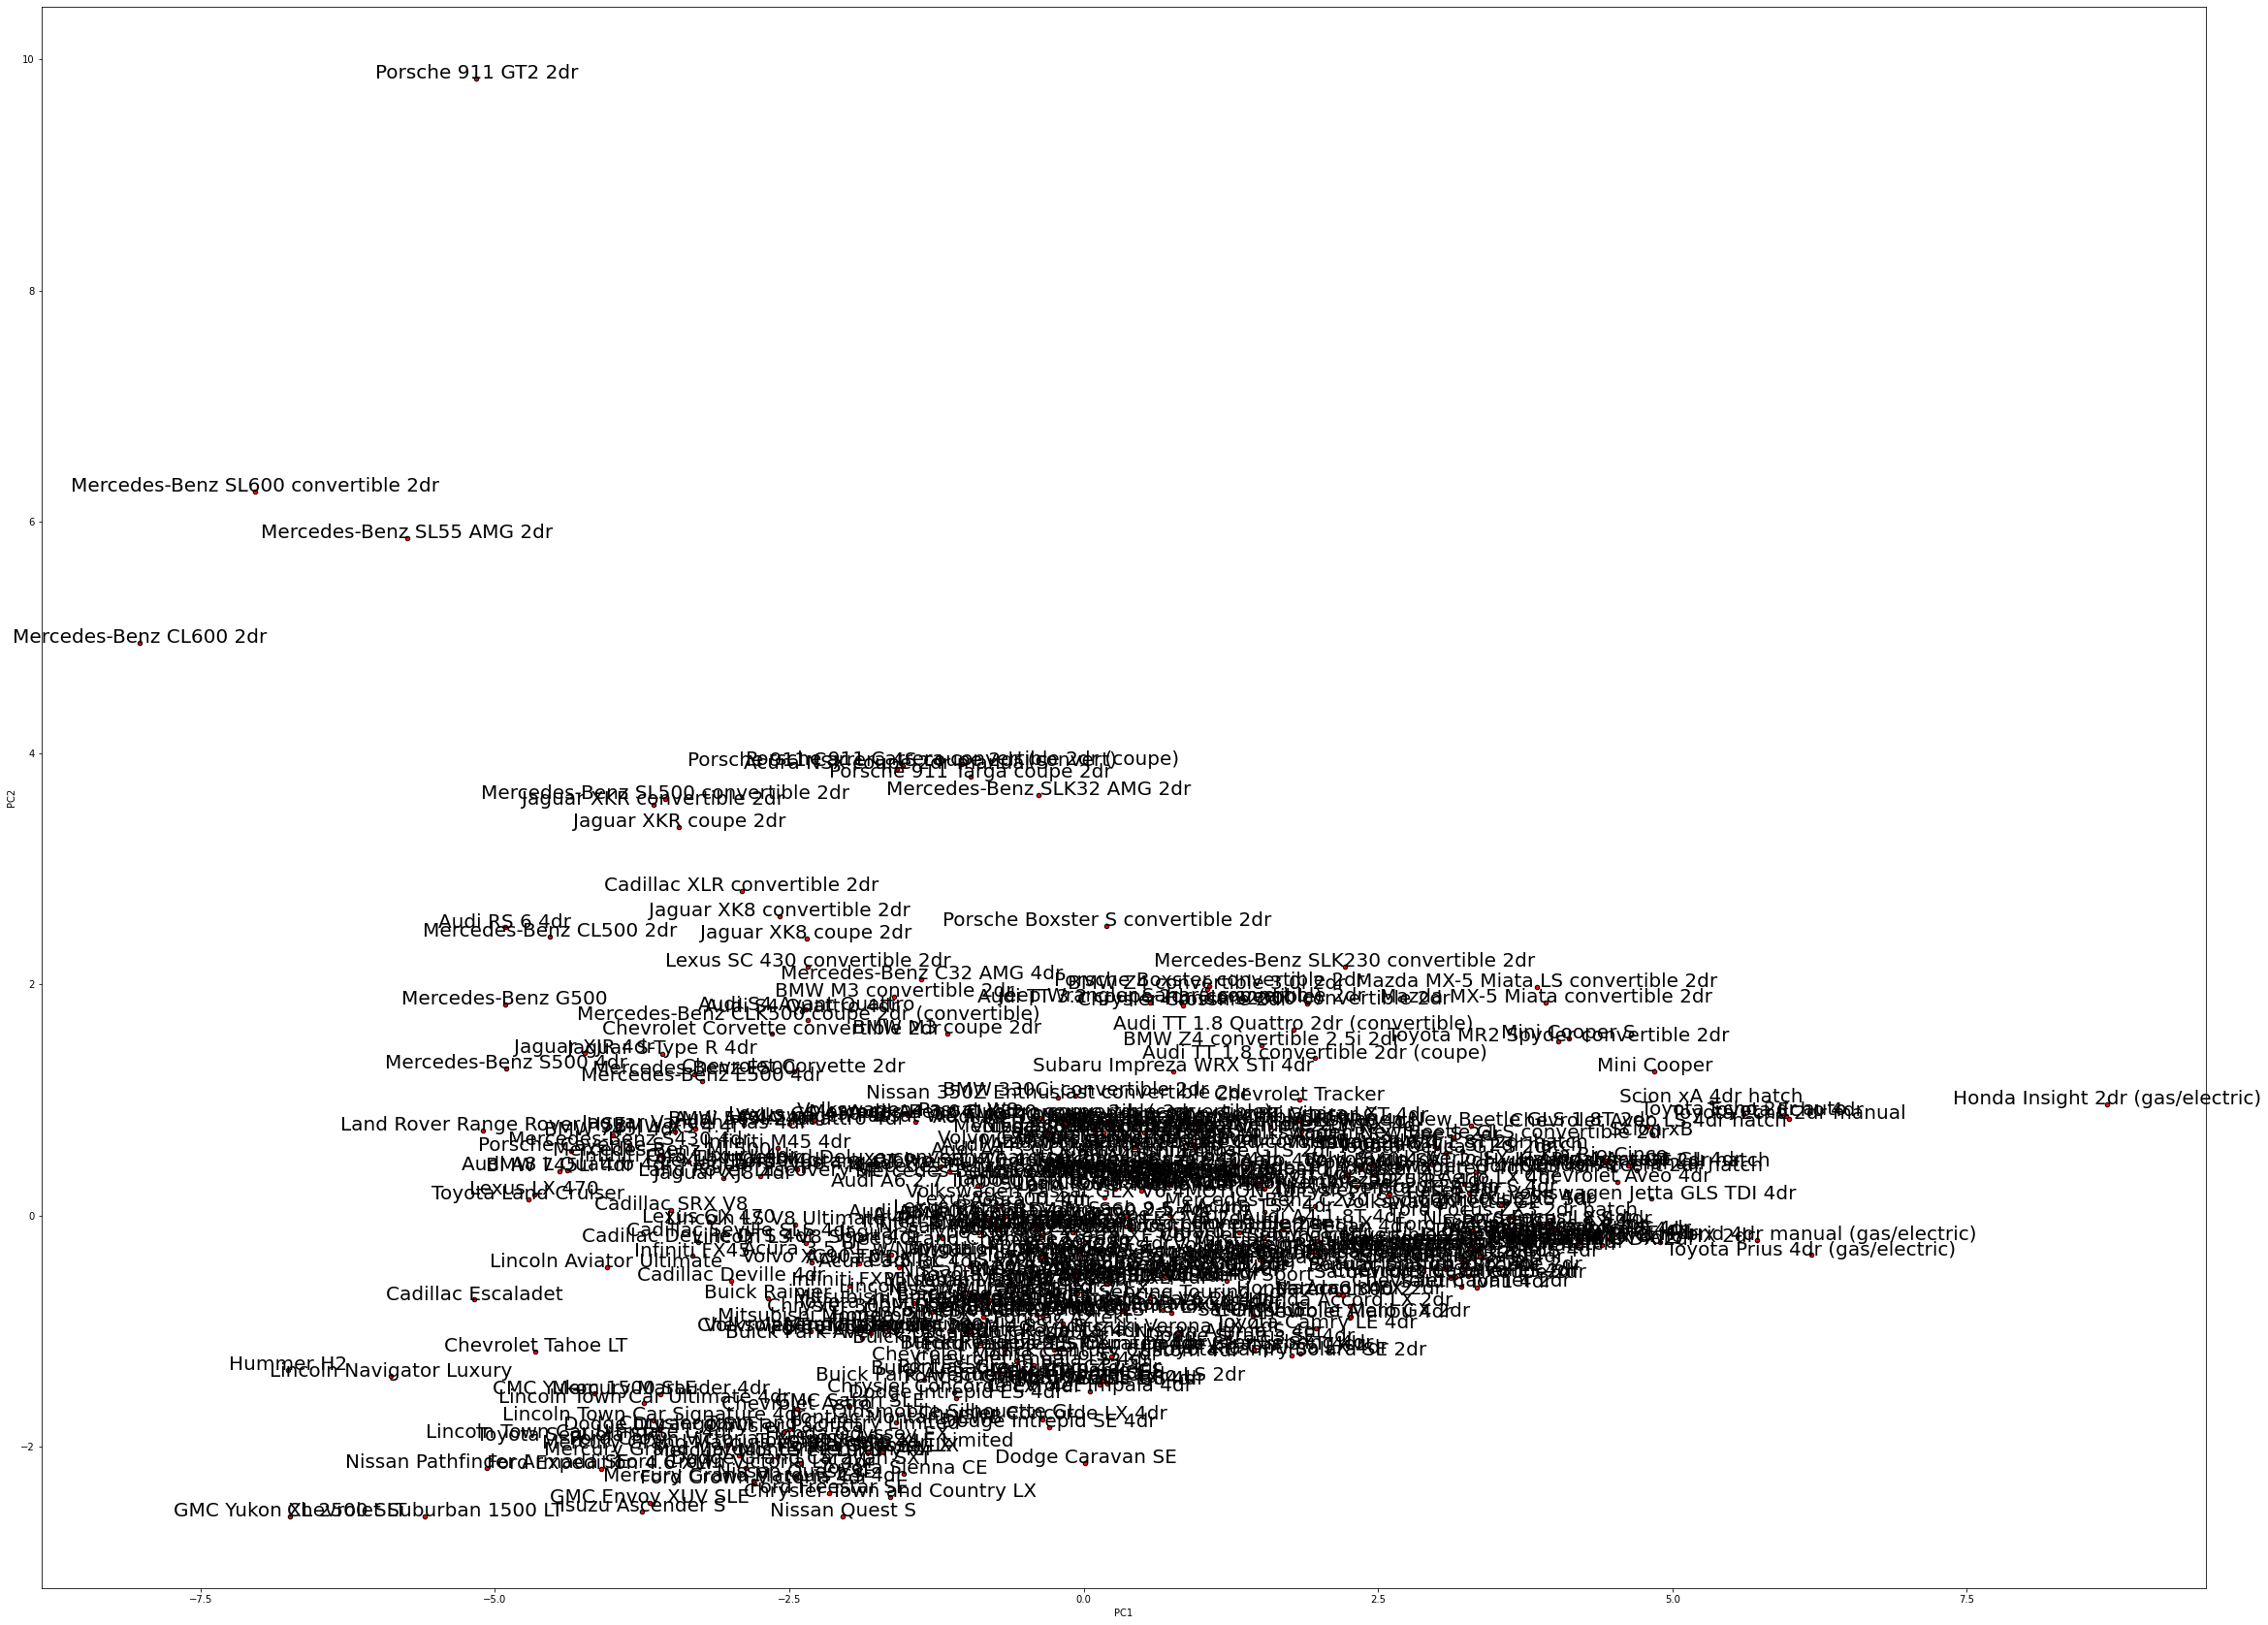

In [102]:
plt.figure(figsize=(40, 30))
x = X_pca[:, 0]
y = X_pca[:, 1]
plt.scatter(x, y, c = "red", s = 20, edgecolor = "k")
plt.xlabel("PC1")
plt.ylabel("PC2")
labels = list(df.iloc[:, 0])
for i, text in enumerate(labels):
    plt.annotate(text, (x[i], y[i]), ha = "center", size = 20)
plt.show()

# U góry po lewej stronie widzimy drogie samochody o dużej mocy. Na dole po lewej stornie znajdują się samochody 
# wielkogabarytowe. Po prawej stronie widzimy samochody ekonomiczne

In [93]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
print("Attribute, PC1, PC2")
for i in range(0,pc1.shape[0]):
    print(attributes[i] + ":" + repr(pc1[i]) + ":" + repr(pc2[i]))
    
# Wydaje mi się, że wartości bliskie zeru mają mniejsze znaczenie dla klasyfikacji

Attribute, PC1, PC2
Retail Price:-0.26375044344403414:0.46850869750253893
Dealer Cost:-0.262318638753095:0.4701465851382258
Engine Size (l):-0.34708049202520075:-0.015347186463713164
Cyl:-0.3341887576286371:0.07803201087501849
HP:-0.31860225848402923:0.2922134761391821
City MPG:0.31048172673231283:-0.0033659357616591945
Hwy MPG:0.30658863858044433:-0.010964460145348617
Weight:-0.3363293669404879:-0.16746357154787017
Wheel Base:-0.2662100335710542:-0.418177106959204
Len:-0.2567901876706821:-0.40841138066875443
Width:-0.2960545914170611:-0.312891350162507


[[-0.26375044 -0.26231864 -0.34708049 -0.33418876 -0.31860226  0.31048173
   0.30658864 -0.33632937 -0.26621003 -0.25679019 -0.29605459]
 [ 0.4685087   0.47014659 -0.01534719  0.07803201  0.29221348 -0.00336594
  -0.01096446 -0.16746357 -0.41817711 -0.40841138 -0.31289135]]


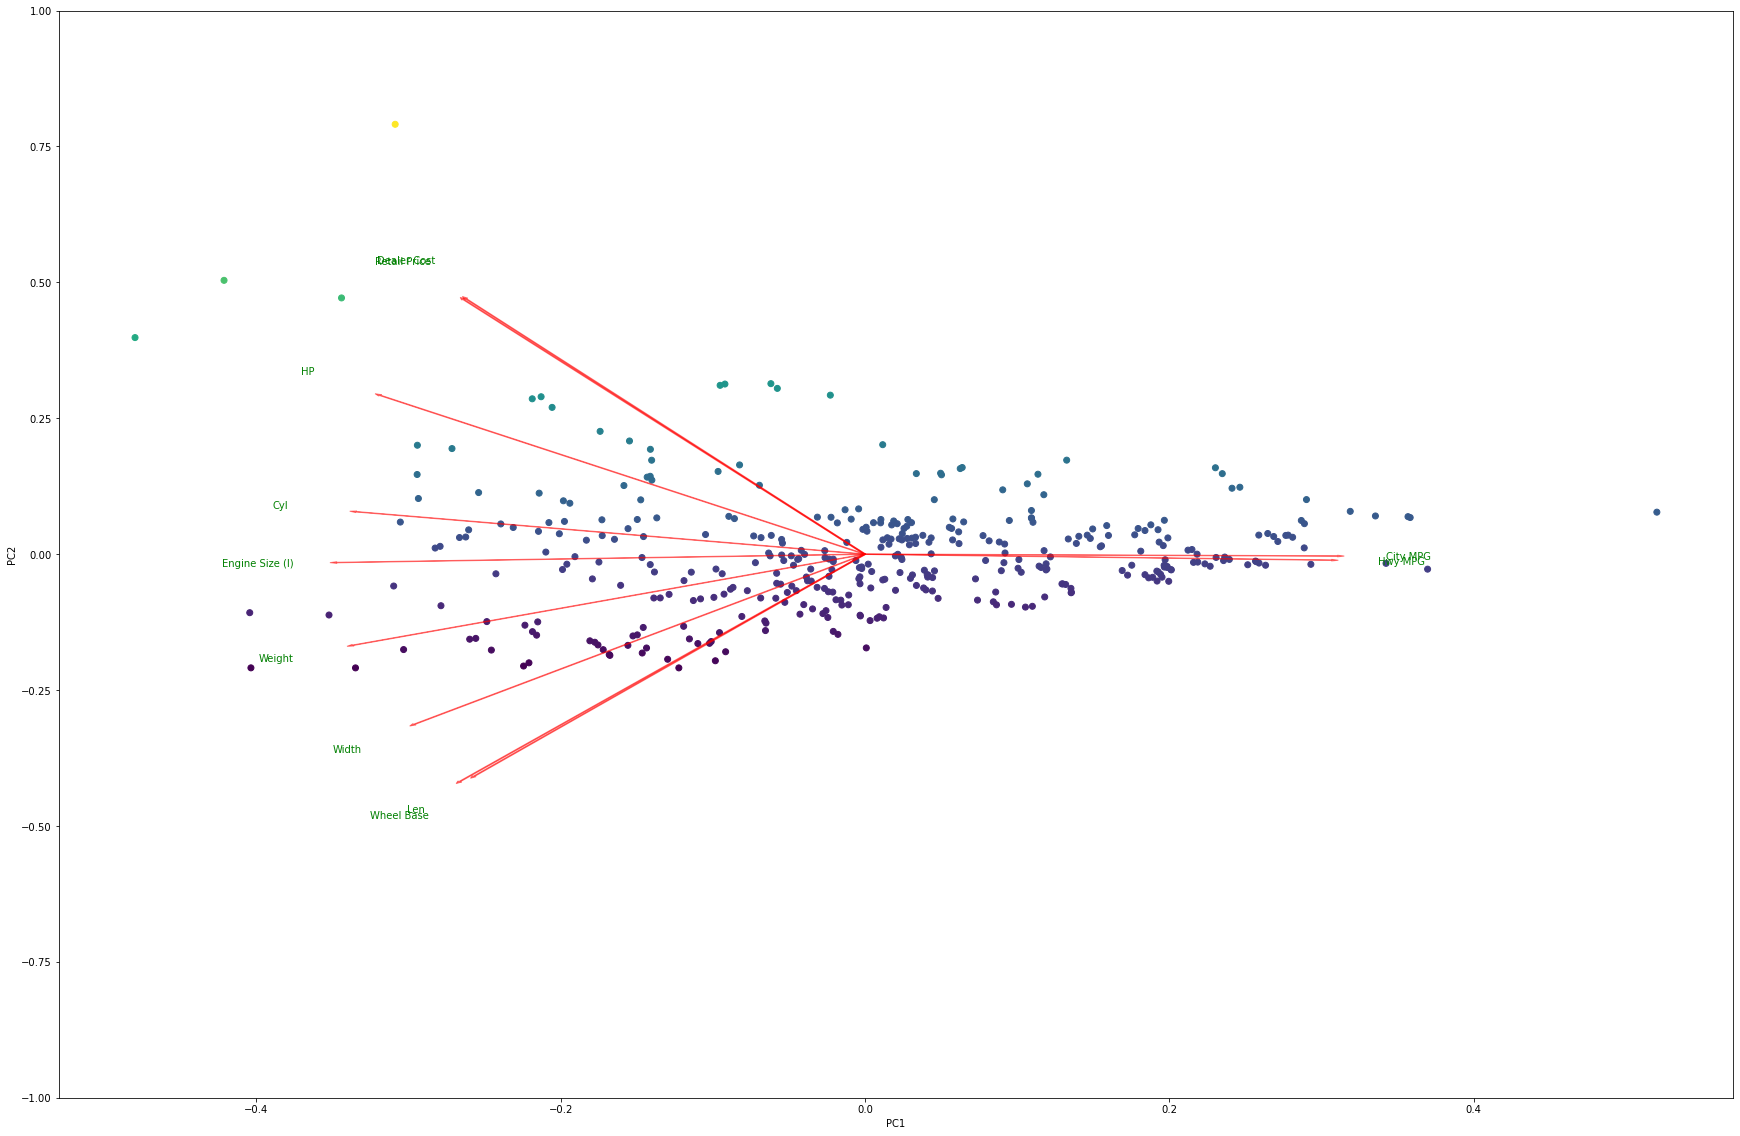

In [103]:
def biplot(score,coeff,labels=None):
    plt.figure(figsize=(30,20))
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    xs = score[:,0]
    ys = score[:,1]
    coeff_shape = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(coeff_shape):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

print(pca.components_[0:2, :])
biplot(X_pca[:,0:2], pca.components_[0:2, :].T, attributes)
axes = plt.gca()
axes.set_ylim([-1.0,1.0])
plt.show()

# Biplot potwierdza wcześniejszą obserwację. Podpisy mówią co ma największe znaczenie przy umiejscowieniu pojazdów w 
# poszczególnych miejscach wykresu. U góry są samochody drogie, na dole znaczenie ma gabaryt, a po prawej
# stronie mamy ekonomiczne, miejskie samochody